In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Results Collection

Results DBs are collected into a separate folder, one for each test, and grouped by scheduler.

In [2]:
RESULTS_DIR = '/vagrant/results/'
BENCH = 'Android_WorkloadsExecution'
BASE_DIR = '{}/{}'.format(RESULTS_DIR, BENCH)

In [3]:
# This is the content of the results folder
!tree {BASE_DIR}

/data/lisa/results/Android_WorkloadsExecution
├── sfreq
│   ├── IOPerf_10
│   │   └── data.csv
│   ├── IOPerf_20
│   │   ├── data.csv
│   │   ├── platform.json
│   │   └── trace.html
│   ├── Jankbench_edit_text
│   │   ├── BenchmarkResults
│   │   └── platform.json
│   ├── Jankbench_high_hitrate_text
│   │   ├── BenchmarkResults
│   │   └── platform.json
│   ├── Jankbench_image_list_view
│   │   ├── BenchmarkResults
│   │   └── platform.json
│   ├── Jankbench_list_view
│   │   ├── BenchmarkResults
│   │   ├── platform.json
│   │   └── trace.html
│   ├── Jankbench_low_hitrate_text
│   │   ├── BenchmarkResults
│   │   └── platform.json
│   ├── Jankbench_shadow_grid
│   │   ├── BenchmarkResults
│   │   └── platform.json
│   └── results.json
├── sutil_pelt
│   ├── IOPerf_20
│   │   ├── data.csv
│   │   └── platform.json
│   ├── IOPerf_200
│   │   ├── data.csv
│   │   └── platform.json
│   ├── Jankbench_edit_text
│   │   ├── BenchmarkResults
│   │   └── platform.json
│   ├── Jankbench_high_

# Results loading

In [4]:
SCHED = ['sfreq', 'sutil_pelt', 'sutil_walt']
TESTS = ['list_view', 'image_list_view', 'edit_text', 'high_hitrate_text', 'low_hitrate_text', 'shadow_grid']
#TESTS = ['list_view']

db = {}
for sched in SCHED:
    db[sched] = {}
    for test in TESTS:
        db[sched][test] = '{}/{}/Jankbench_{}/BenchmarkResults'.format(BASE_DIR, sched, test)

In [5]:
# Results table schema:
# CREATE TABLE ui_results (
#   _id INTEGER PRIMARY KEY AUTOINCREMENT,
#   name TEXT,
#   run_id INTEGER,
#   iteration INTEGER,
#   timestamp TEXT,
#   unknown_delay REAL,
#   input REAL,
#   animation REAL,
#   layout REAL,
#   draw REAL,
#   sync REAL,
#   command_issue REAL,
#   swap_buffers REAL,
#   total_duration REAL,
#   jank_frame BOOLEAN,
#   device_charging INTEGER
#);

# Selection of columns of interest
COLS = ['_id', 'name', 'run_id', 'iteration', 'total_duration', 'jank_frame']

data = []
for sched in db:
    for test in db[sched]:
        conn = sqlite3.connect(db[sched][test])
        for row in conn.execute('SELECT {} FROM ui_results'.format(','.join(COLS))):
            row = (sched, ) + row
            data.append(row)
        print "DB[{}]:{:<20s}: {:6d} rows imported".format(sched, test, len(data))

    
df = {
    'all' : pd.DataFrame(data, columns=['sched', ] + COLS)
}
print "Total imported rows: ", len(df['all'])
# df['all'].head()

DB[sutil_walt]:low_hitrate_text    :   1438 rows imported
DB[sutil_walt]:high_hitrate_text   :   2849 rows imported
DB[sutil_walt]:list_view           :   4437 rows imported
DB[sutil_walt]:shadow_grid         :   5923 rows imported
DB[sutil_walt]:image_list_view     :   7534 rows imported
DB[sutil_walt]:edit_text           :   7703 rows imported
DB[sfreq]:low_hitrate_text    :   9201 rows imported
DB[sfreq]:high_hitrate_text   :  10702 rows imported
DB[sfreq]:list_view           :  12327 rows imported
DB[sfreq]:shadow_grid         :  13841 rows imported
DB[sfreq]:image_list_view     :  15466 rows imported
DB[sfreq]:edit_text           :  15637 rows imported
DB[sutil_pelt]:low_hitrate_text    :  17039 rows imported
DB[sutil_pelt]:high_hitrate_text   :  18494 rows imported
DB[sutil_pelt]:list_view           :  20085 rows imported
DB[sutil_pelt]:shadow_grid         :  21507 rows imported
DB[sutil_pelt]:image_list_view     :  23121 rows imported
DB[sutil_pelt]:edit_text           :  23294 

# Overall statistics

`pandas` provides powerful method to compute statistics on collected data. For example:

In [6]:
byname_sched = df['all'].groupby(['name','sched']).total_duration.describe(percentiles=[0.90, 0.95, 0.99])

In [7]:
stats = pd.DataFrame(byname_sched)
stats = stats.unstack()
stats = stats.rename(columns={0 : 'statistics'})
stats

total_duration                        \
                                             count       mean        std   
name                     sched                                             
Edit Text Input          sfreq               171.0  13.246591   7.404576   
                         sutil_pelt          173.0  34.618934  51.496117   
                         sutil_walt          169.0  18.561931  11.831869   
High-hitrate text render sfreq              1498.0  15.741187   7.167933   
                         sutil_pelt         1402.0  27.171331  26.680469   
                         sutil_walt         1438.0  21.237568  18.259679   
Image List View Fling    sfreq              1625.0  11.189662   5.462566   
                         sutil_pelt         1614.0  13.852705  13.046292   
                         sutil_walt         1611.0  12.707143   9.834832   
List View Fling          sfreq              1625.0   9.777040   5.069503   
                         sutil_pelt         1591.0  15.779216  13.441612   
                         sutil_walt         1588.0  19.524255  11.806355   
Low-hitrate text render  sfreq              1501.0  15.575273   6.720410   
                         sutil_pelt         1455.0  21.944176  20.222787   
                         sutil_walt         1411.0  23.928947  19.612566   
Shadow Grid Fling        sfreq              1514.0  14.469154   6.493085   
                         sutil_pelt         1422.0  22.268715  21.864778   
                         sutil_walt         1486.0  20.437092  22.272268   

                                                                     \
                                          min        50%        90%   
name                     sched                                        
Edit Text Input          sfreq       5.234856  11.130045  21.400501   
                         sutil_pelt  3.812522  25.801070  49.325352   
                         sutil_walt  5.760449  13.886475  34.163843   
High-hitrate text render sfreq       6.452038  14.656260  24.893603   
                         sutil_pelt  6.853358  14.517537  68.443071   
                         sutil_walt  7.774397  15.251337  35.037247   
Image List View Fling    sfreq       4.093387  10.337858  17.611204   
                         sutil_pelt  4.438251  10.225054  27.533759   
                         sutil_walt  4.724334   9.909550  25.859160   
List View Fling          sfreq       4.632279   7.689985  14.646838   
                         sutil_pelt  5.401786  11.319720  30.789191   
                         sutil_walt  8.090228  14.306615  31.670046   
Low-hitrate text render  sfreq       6.168145  14.634857  24.748444   
                         sutil_pelt  6.680102  14.314570  45.703039   
                         sutil_walt  8.122431  17.415843  49.251148   
Shadow Grid Fling        sfreq       6.730573  13.179959  20.966274   
                         sutil_pelt  7.128768  11.824231  53.674136   
                         sutil_walt  7.726140  14.932756  34.580411   

                                                                        
                                           95%         99%         max  
name                     sched                                          
Edit Text Input          sfreq       26.045479   33.083920   72.257108  
                         sutil_pelt  59.264505  335.672540  417.040017  
                         sutil_walt  37.676267   49.850151   80.451860  
High-hitrate text render sfreq       27.386810   39.927884  137.405286  
                         sutil_pelt  87.798681  123.457552  146.882521  
                         sutil_walt  66.545877   96.038914  130.846563  
Image List View Fling    sfreq       22.946500   27.825547   94.472679  
                         sutil_pelt  40.472056   68.164459  143.973268  
                         sutil_walt  31.041277   48.590522  162.052894  
List View Fling          sfreq       21.520944   27.256702   81.252407 

# Plots

In [8]:
avg = df['all'].groupby(['name', 'sched']).total_duration.mean()
avg = pd.DataFrame(avg)
avg.rename(columns={'total_duration' : 'avg'}, inplace=True)
avg = avg.unstack()
# avg

In [9]:
std = df['all'].groupby(['name', 'sched']).total_duration.std()
std = pd.DataFrame(std)
std.rename(columns={'total_duration' : 'avg'}, inplace=True)
std = std.unstack()
# std

## Average and std dev

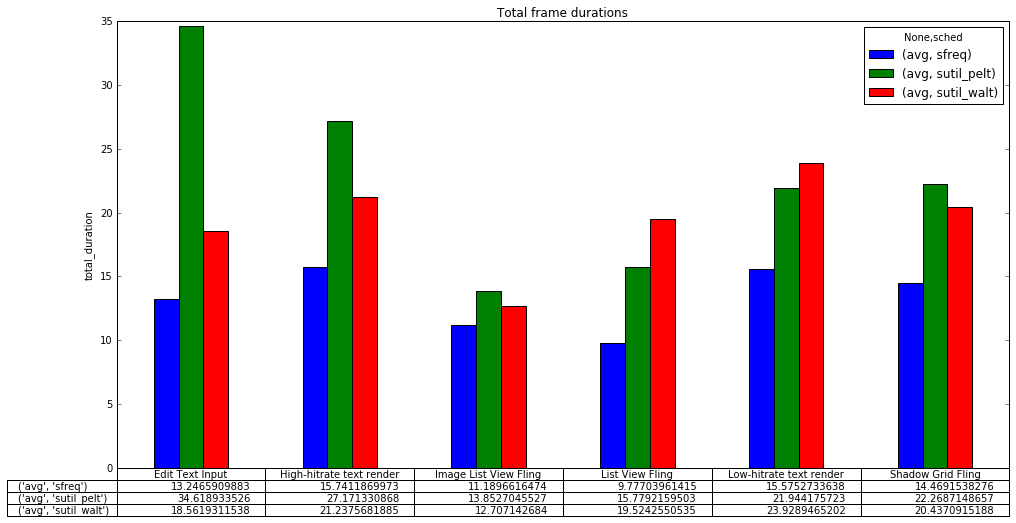

In [10]:
fig, axes = plt.subplots()

# Plot average
avg.plot(kind='bar', ax=axes,
           figsize=(16,8), legend=True,
           title="Total frame durations",
           table=True)
axes.set_ylabel("total_duration")
axes.get_xaxis().set_visible(False)

## Boxplots

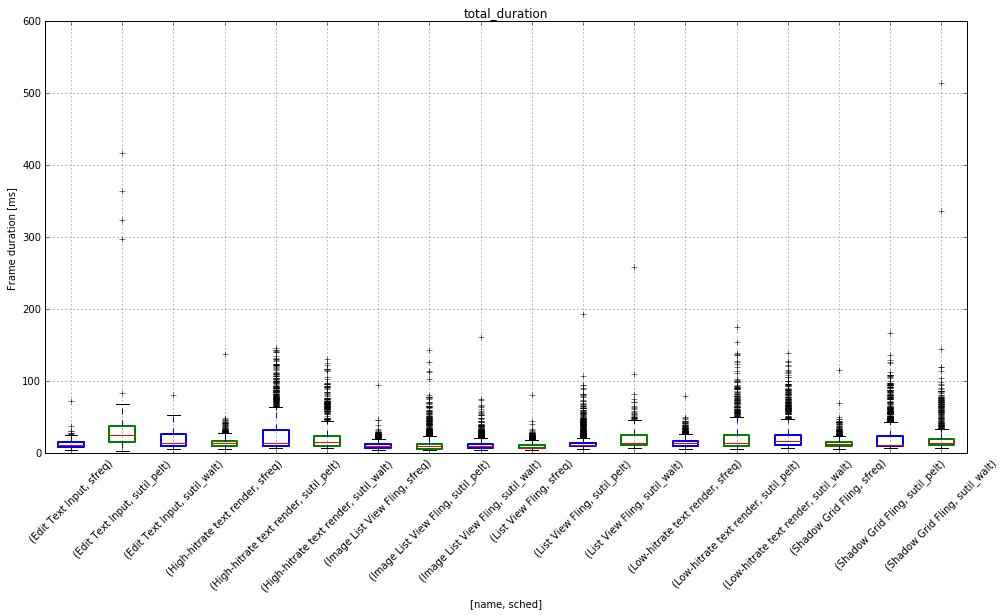

In [11]:
data = df['all']

def adjust_colors():
    keys = ['boxes','fliers']
    for key in keys:
        i = 0
        for item in bp['total_duration'][key]:
            item.set(linewidth=2)
            if (i%2):
                item.set(color='green')
            i += 1

fig, axes = plt.subplots(figsize=(16,8))

bp = data.boxplot(by=['name','sched'], column='total_duration', ax=axes, return_type='dict')
adjust_colors()

fig.suptitle('')
xlabels = [item.get_text() for item in axes.xaxis.get_ticklabels()]
axes.set_xticklabels(xlabels, rotation=45)
axes.set_ylabel('Frame duration [ms]');

## Total duration vs. time (samples)

In [12]:
# Split data per scheduler
for sched in db:
    df[sched] = df['all'][df['all'].sched == sched]
    df[sched].set_index(['_id'], inplace=True)

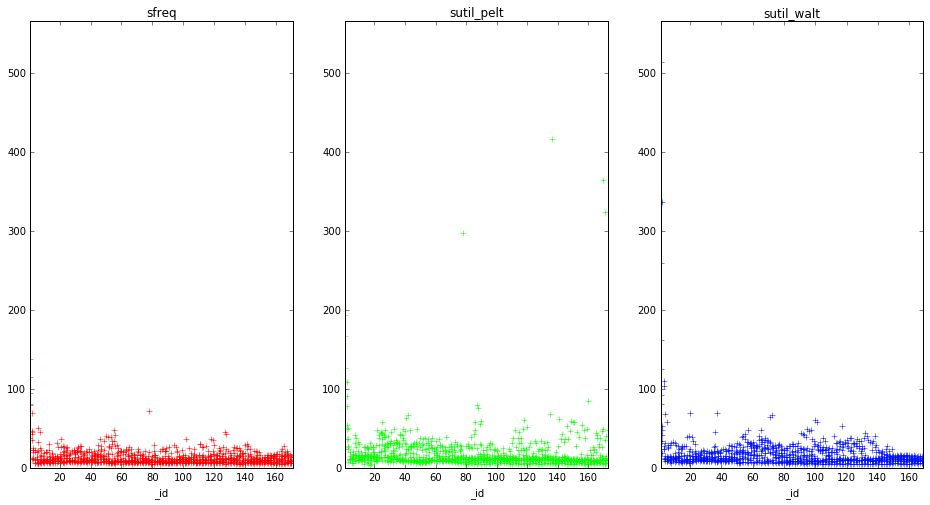

In [13]:
from trappy.plotter.ColorMap import ColorMap

cmap = ColorMap(len(SCHED))
color_map = map(cmap.cmap, range(len(SCHED)))

fig, axes = plt.subplots(ncols=len(SCHED))

ymax = df[SCHED[0]].total_duration.max()
for sd in SCHED[1:]:
    ymax = max(ymax, df[sd].total_duration.max())
ymax *= 1.1

for idx, sd in enumerate(SCHED):
    df[sd].total_duration.plot(style='+',
                               figsize=(16,8),
                               ax=axes[idx],
                               color=color_map[idx],
                               title=sd,
                               ylim=(0,ymax))

## Total duration sorted samples

In [14]:
for sched in db:
    df[sched + '_sorted'] = pd.DataFrame(sorted(df[sched].total_duration))

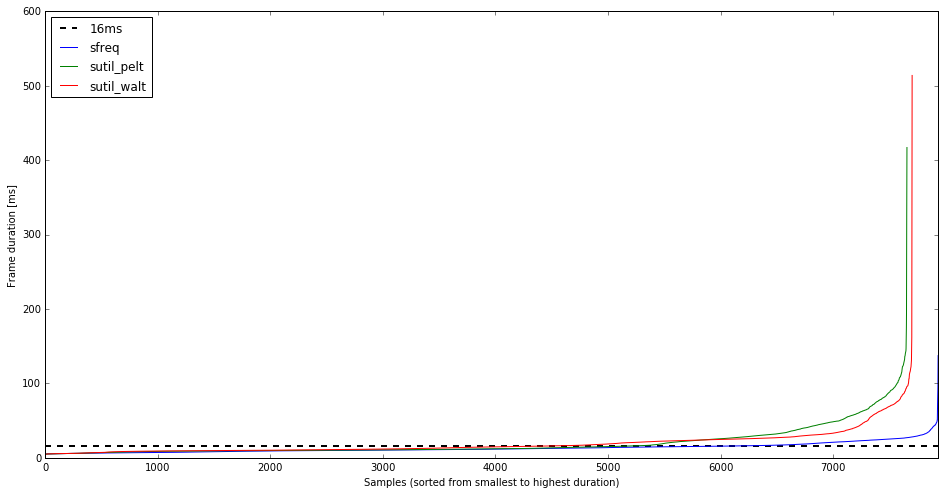

In [15]:
fig, axes = plt.subplots()

plt.axhline(y=16, linewidth=2, color='black', linestyle='--')
for sd in SCHED:
    df[sd + '_sorted'].plot(figsize=(16,8), ax=axes, legend=False)

axes.set_xlabel('Samples (sorted from smallest to highest duration)')
axes.set_ylabel('Frame duration [ms]')
plt.legend(['16ms'] + SCHED, loc='best');

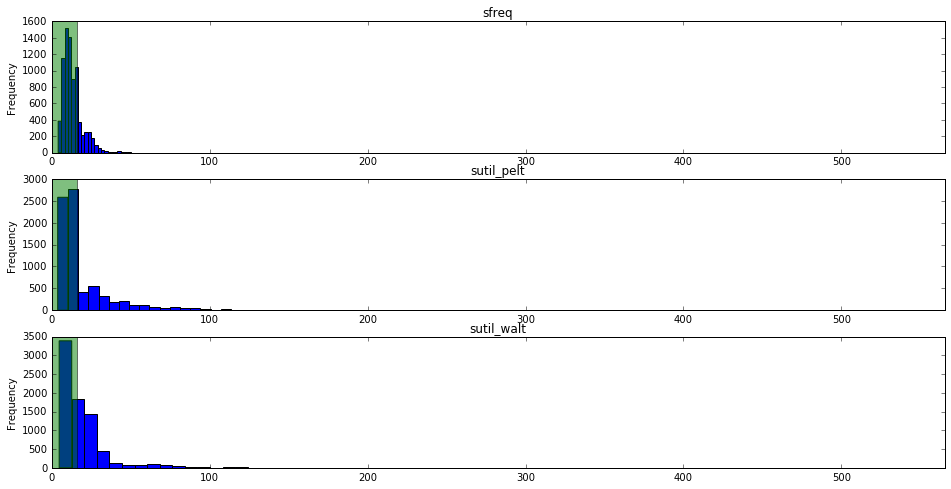

In [16]:
fig, axes = plt.subplots(nrows=len(SCHED))

ymax = df[SCHED[0]].total_duration.max()
for sd in SCHED[1:]:
    ymax = max(ymax, df[sd].total_duration.max())
ymax = ymax*1.1

for idx, sd in enumerate(SCHED):
    df[sd].total_duration.plot(kind='hist', bins=64, xlim=(0,ymax),
                               figsize=(16,8), ax=axes[idx],
                               legend=False, title=sd)
    axes[idx].axvspan(0, 16, facecolor='g', alpha=0.5, axes=axes[idx])